In [ ]:
# Connect with your Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Set a Panda Dataframe with the appropriate labels
df = pd.read_csv("/content/2ROUND_DYNASENT_iemocap_semantic_analysis.csv")
df = df.rename(columns={"titre": "File", "to_translate": "Text", "emotion": "Acoustic_Annotation", "Semantic Analysis": "Semantic_Analysis"})
df

,File,Text,Acoustic_Annotation,Semantic_Analysis
0,Ses02M_impro02_F000,I don't want you to go.,sad,negative
1,Ses02M_impro02_M000,"I know, I know. I don't want to go either bab...",sad,neutral
2,Ses02M_impro02_F001,I'm going to miss you too; I don't know what ...,sad,negative
3,Ses02M_impro02_F002,I don't want to be a single mom.,sad,neutral
4,Ses02M_impro02_M001,You won't be. I'll be back; I'll be back befo...,sad,neutral
...,...,...,...,...
10034,Ses01M_script01_3_F028,Everything Chris do you understand that? To ...,ang,neutral
10035,Ses01M_script01_3_F029,And your money there's nothing wrong in your ...,fru,negative
10036,Ses01M_script01_3_M042,Annie...,hap,neutral
10037,Ses01M_script01_3_M043,I'm going to make a fortune for you.,hap,neutral


In [ ]:
# Filter the DataFrame
filtered_df = df[(df['Acoustic_Annotation'].isin(['ang', 'hap'])) & (df['Semantic_Analysis'] == 'positive')]

print(filtered_df.count())
filtered_df.head(10)


File                   115
Text                   115
Acoustic_Annotation    115
Semantic_Analysis      115
dtype: int64


,File,Text,Acoustic_Annotation,Semantic_Analysis
115,Ses03M_script03_2_F002,Not at all. It was very pretty. I still hav...,ang,positive
192,Ses03M_script03_2_M041,Very amusing indeed.,ang,positive
279,Ses05M_impro03_M012,Wasn't that great? I didn't want it to be too...,hap,positive
280,Ses05M_impro03_F008,so cute.,hap,positive
287,Ses05M_impro03_M015,It was a lot of fun- It was a lot of fun. Sh...,hap,positive
293,Ses05M_impro03_M018,"Um- And she wants you to be in it, too. She ...",hap,positive
301,Ses05M_impro03_M022,"Yes, me too. Oh I am so in love.",hap,positive
322,Ses05M_impro03_M032,it's great. I'm a lucky man.,hap,positive
323,Ses05M_impro03_F031,"That's incredible yeah ,Congratulations.",hap,positive
324,Ses05M_impro03_M033,Thank you.,hap,positive


In [ ]:
 #Copie your Kaggle API key
!cp /content/drive/MyDrive/Kaggle/kaggle.json /content/

In [ ]:
# Download IEMOCAP
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download mouadriali/iemocap-transcriptions-english-french

Dataset URL: https://www.kaggle.com/datasets/mouadriali/iemocap-transcriptions-english-french
License(s): Attribution-NonCommercial 4.0 International (CC BY-NC 4.0)
100% 5.78G/5.78G [01:15<00:00, 157MB/s]
100% 5.78G/5.78G [01:15<00:00, 82.7MB/s]


In [ ]:
!unzip '/content/iemocap-transcriptions-english-french.zip'

Streaming output truncated to the last 5000 lines.
  inflating: mfccs_figures-20220508T233533Z-001/mfccs_figures/Ses03M_impro05a_M016_mfcc.png  
  inflating: mfccs_figures-20220508T233533Z-001/mfccs_figures/Ses03M_impro05a_M017_mfcc.png  
  inflating: mfccs_figures-20220508T233533Z-001/mfccs_figures/Ses03M_impro05a_M018_mfcc.png  
  inflating: mfccs_figures-20220508T233533Z-001/mfccs_figures/Ses03M_impro05a_M019_mfcc.png  
  inflating: mfccs_figures-20220508T233533Z-001/mfccs_figures/Ses03M_impro05a_M020_mfcc.png  
  inflating: mfccs_figures-20220508T233533Z-001/mfccs_figures/Ses03M_impro05a_M021_mfcc.png  
  inflating: mfccs_figures-20220508T233533Z-001/mfccs_figures/Ses03M_impro05a_M022_mfcc.png  
  inflating: mfccs_figures-20220508T233533Z-001/mfccs_figures/Ses03M_impro05a_M023_mfcc.png  
  inflating: mfccs_figures-20220508T233533Z-001/mfccs_figures/Ses03M_impro05a_M024_mfcc.png  
  inflating: mfccs_figures-20220508T233533Z-001/mfccs_figures/Ses03M_impro05a_M025_mfcc.png  
  inflati

In [ ]:
!pip install praat-parselmouth
!pip install config
!pip install pydub

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 85.7 MB/s eta 0:00:00


In [ ]:
#Measure pitch of all wav files in directory
import glob
import math
import numpy as np
import pandas as pd
import parselmouth
from parselmouth.praat import call

In [ ]:


def measurePitch(sound, f0min, f0max, unit):
    pitch = call(sound, "To Pitch", 0.0, f0min, f0max)
    meanF0 = call(pitch, "Get mean", 0, 0, unit)
    stdevF0 = call(pitch, "Get standard deviation", 0 ,0, unit)
    harmonicity = call(sound, "To Harmonicity (cc)", 0.01, 75, 0.1, 1.0)
    hnr = call(harmonicity, "Get mean", 0, 0)
    return meanF0, stdevF0, hnr

def speech_rate(filename):
    silencedb = -25
    mindip = 2
    minpause = 0.3
    sound = parselmouth.Sound(filename)
    originaldur = sound.get_total_duration()
    intensity = sound.to_intensity(50)
    start = call(intensity, "Get time from frame number", 1)
    nframes = call(intensity, "Get number of frames")
    end = call(intensity, "Get time from frame number", nframes)
    min_intensity = call(intensity, "Get minimum", 0, 0, "Parabolic")
    max_intensity = call(intensity, "Get maximum", 0, 0, "Parabolic")

    # get .99 quantile to get maximum (without influence of non-speech sound bursts)
    max_99_intensity = call(intensity, "Get quantile", 0, 0, 0.99)

    # estimate Intensity threshold
    threshold = max_99_intensity + silencedb
    threshold2 = max_intensity - max_99_intensity
    threshold3 = silencedb - threshold2
    if threshold < min_intensity:
        threshold = min_intensity

    # get pauses (silences) and speakingtime
    textgrid = call(intensity, "To TextGrid (silences)", threshold3, minpause, 0.1, "silent", "sounding")
    silencetier = call(textgrid, "Extract tier", 1)
    silencetable = call(silencetier, "Down to TableOfReal", "sounding")
    npauses = call(silencetable, "Get number of rows")
    speakingtot = 0
    for ipause in range(npauses):
        pause = ipause + 1
        beginsound = call(silencetable, "Get value", pause, 1)
        endsound = call(silencetable, "Get value", pause, 2)
        speakingdur = endsound - beginsound
        speakingtot += speakingdur

    intensity_matrix = call(intensity, "Down to Matrix")
    sound_from_intensity_matrix = call(intensity_matrix, "To Sound (slice)", 1)
    intensity_duration = call(sound_from_intensity_matrix, "Get total duration")
    point_process = call(sound_from_intensity_matrix, "To PointProcess (extrema)", "Left", "yes", "no", "Sinc70")
    numpeaks = call(point_process, "Get number of points")
    t = [call(point_process, "Get time from index", i + 1) for i in range(numpeaks)]

    timepeaks = []
    peakcount = 0
    intensities = []
    for i in range(numpeaks):
        value = call(sound_from_intensity_matrix, "Get value at time", t[i], "Cubic")
        if value > threshold:
            peakcount += 1
            intensities.append(value)
            timepeaks.append(t[i])

    validpeakcount = 0
    currenttime = timepeaks[0]
    currentint = intensities[0]
    validtime = []

    for p in range(peakcount - 1):
        following = p + 1
        followingtime = timepeaks[p + 1]
        dip = call(intensity, "Get minimum", currenttime, timepeaks[p + 1], "None")
        diffint = abs(currentint - dip)
        if diffint > mindip:
            validpeakcount += 1
            validtime.append(timepeaks[p])
        currenttime = timepeaks[following]
        currentint = call(intensity, "Get value at time", timepeaks[following], "Cubic")

    pitch = sound.to_pitch_ac(0.02, 30, 4, False, 0.03, 0.25, 0.01, 0.35, 0.25, 450)
    voicedcount = 0
    voicedpeak = []

    for time in range(validpeakcount):
        querytime = validtime[time]
        whichinterval = call(textgrid, "Get interval at time", 1, querytime)
        whichlabel = call(textgrid, "Get label of interval", 1, whichinterval)
        value = pitch.get_value_at_time(querytime)
        if not math.isnan(value):
            if whichlabel == "sounding":
                voicedcount += 1
                voicedpeak.append(validtime[time])

    timecorrection = originaldur / intensity_duration

    speakingrate = voicedcount / originaldur
    articulationrate = voicedcount / speakingtot
    npause = npauses - 1
    asd = speakingtot / voicedcount
    speechrate_dictionary = {'soundname':filename,
                             'nsyll':voicedcount,
                             'npause': npause,
                             'dur(s)':originaldur,
                             'phonationtime(s)':intensity_duration,
                             'speechrate(nsyll / dur)': speakingrate,
                             "articulation rate(nsyll / phonationtime)":articulationrate,
                             "ASD(speakingtime / nsyll)":asd}
    return speechrate_dictionary

# Set a Panda Dataframe with the appropriate labels
df = filtered_df

# Create lists to put the results
file_list = []
mean_F0_list = []
sd_F0_list = []
hnr_list = []
intensity_list = []
Semantic_Prediction_list = []
Acoustic_Annotation_list = []
speech_rate_list = []  # List to hold speech rates
articulation_rate_list = []  # List to hold articulation rates
avg_syllable_duration_list = []  # List to hold average syllable duration

# Go through all the rows in the DataFrame
for _, row in df.iterrows():
    audio_name = str(row["File"])
    path = "/content/Iemocap_audio/iemocap_audio/IEMOCAP_wav/"
    audio_file_path = path + audio_name + ".wav"

    # Measure pitch using your function (measurePitch)
    sound = parselmouth.Sound(audio_file_path)
    meanF0, stdevF0, hnr = measurePitch(sound, 75, 500, "Hertz")

    # Get intensity average
    intensity = sound.to_intensity()
    intensity_avg = intensity.get_average()

    # Calculate speech rate
    speech_rate_dict = speech_rate(audio_file_path)
    speech_rate_val = speech_rate_dict['speechrate(nsyll / dur)']

    # Extract articulation rate and average syllable duration from speech rate dictionary
    articulation_rate_val = speech_rate_dict["articulation rate(nsyll / phonationtime)"]
    avg_syllable_duration_val = speech_rate_dict["ASD(speakingtime / nsyll)"]

    # Append values to lists
    file_list.append(audio_file_path)
    mean_F0_list.append(meanF0)
    sd_F0_list.append(stdevF0)
    hnr_list.append(hnr)
    intensity_list.append(intensity_avg)
    Semantic_Prediction_list.append(row['Semantic_Analysis'])
    Acoustic_Annotation_list.append(row['Acoustic_Annotation'])
    speech_rate_list.append(speech_rate_val)
    articulation_rate_list.append(articulation_rate_val)
    avg_syllable_duration_list.append(avg_syllable_duration_val)

# Create a DataFrame with all the collected information
df_features = pd.DataFrame({
    'voiceID': file_list,
    'meanF0Hz': mean_F0_list,
    'stdevF0Hz': sd_F0_list,
    'HNR': hnr_list,
    'IntensityAvg': intensity_list,
    'SpeechRate': speech_rate_list,
    'ArticulationRate': articulation_rate_list,
    'AvgSyllableDuration': avg_syllable_duration_list,
    'Semantic_Analysis': Semantic_Prediction_list,
    'Acoustic_Annotation': Acoustic_Annotation_list
})

df_features.head(100)


,voiceID,meanF0Hz,stdevF0Hz,HNR,IntensityAvg,SpeechRate,ArticulationRate,AvgSyllableDuration,Semantic_Analysis,Acoustic_Annotation
0,/content/Iemocap_audio/iemocap_audio/IEMOCAP_w...,283.947275,72.350889,12.226518,56.601938,3.413073,4.915730,0.203429,positive,ang
1,/content/Iemocap_audio/iemocap_audio/IEMOCAP_w...,90.668142,23.957232,7.983038,49.558740,1.359042,1.359042,0.735812,positive,ang
2,/content/Iemocap_audio/iemocap_audio/IEMOCAP_w...,214.801554,101.873588,8.986035,69.460860,3.163686,3.608409,0.277130,positive,hap
3,/content/Iemocap_audio/iemocap_audio/IEMOCAP_w...,280.637019,117.725798,14.663642,67.539403,3.653072,3.653072,0.273742,positive,hap
4,/content/Iemocap_audio/iemocap_audio/IEMOCAP_w...,157.024110,78.485938,7.183939,57.351445,5.010961,5.010961,0.199562,positive,hap
...,...,...,...,...,...,...,...,...,...,...
95,/content/Iemocap_audio/iemocap_audio/IEMOCAP_w...,116.644314,30.613056,9.575987,52.276454,3.440803,4.982573,0.200700,positive,hap
96,/content/Iemocap_audio/iemocap_audio/IEMOCAP_w...,287.939718,109.887193,11.388788,58.595184,5.045872,5.045872,0.198182,positive,hap
97,/content/Iemocap_audio/iemocap_audio/IEMOCAP_w...,195.175399,11.249905,11.519191,56.558017,2.304147,3.385240,0.295400,positive,hap
98,/content/Iemocap_audio/iemocap_audio/IEMOCAP_w...,201.673043,39.553774,10.048487,60.141393,4.032309,4.480349,0.223197,positive,hap


In [ ]:
# Define a function to create the tag
def create_tag(row):
    if row['Semantic_Analysis'] == 'positive' and row['Acoustic_Annotation'] == 'hap':
        return 'Sincere'
    elif row['Semantic_Analysis'] == 'positive' and row['Acoustic_Annotation'] == 'ang':
        return 'Sarcasm'
    else:
        return 'Other'

# Apply the function to create the tag column
df_features['Tag'] = df_features.apply(create_tag, axis=1)

# Print the updated DataFrame
df_features.head(100)

,voiceID,meanF0Hz,stdevF0Hz,HNR,IntensityAvg,SpeechRate,ArticulationRate,AvgSyllableDuration,Semantic_Analysis,Acoustic_Annotation,Tag
0,/content/Iemocap_audio/iemocap_audio/IEMOCAP_w...,283.947275,72.350889,12.226518,56.601938,3.413073,4.915730,0.203429,positive,ang,Sarcasm
1,/content/Iemocap_audio/iemocap_audio/IEMOCAP_w...,90.668142,23.957232,7.983038,49.558740,1.359042,1.359042,0.735812,positive,ang,Sarcasm
2,/content/Iemocap_audio/iemocap_audio/IEMOCAP_w...,214.801554,101.873588,8.986035,69.460860,3.163686,3.608409,0.277130,positive,hap,Sincere
3,/content/Iemocap_audio/iemocap_audio/IEMOCAP_w...,280.637019,117.725798,14.663642,67.539403,3.653072,3.653072,0.273742,positive,hap,Sincere
4,/content/Iemocap_audio/iemocap_audio/IEMOCAP_w...,157.024110,78.485938,7.183939,57.351445,5.010961,5.010961,0.199562,positive,hap,Sincere
...,...,...,...,...,...,...,...,...,...,...,...
95,/content/Iemocap_audio/iemocap_audio/IEMOCAP_w...,116.644314,30.613056,9.575987,52.276454,3.440803,4.982573,0.200700,positive,hap,Sincere
96,/content/Iemocap_audio/iemocap_audio/IEMOCAP_w...,287.939718,109.887193,11.388788,58.595184,5.045872,5.045872,0.198182,positive,hap,Sincere
97,/content/Iemocap_audio/iemocap_audio/IEMOCAP_w...,195.175399,11.249905,11.519191,56.558017,2.304147,3.385240,0.295400,positive,hap,Sincere
98,/content/Iemocap_audio/iemocap_audio/IEMOCAP_w...,201.673043,39.553774,10.048487,60.141393,4.032309,4.480349,0.223197,positive,hap,Sincere


In [ ]:
print (df_features)
df_features.to_csv("2Rnd_3BERT_features_Sarcasm_vs_Sincere.csv", index=False)

                                               voiceID    meanF0Hz  \
0    /content/Iemocap_audio/iemocap_audio/IEMOCAP_w...  283.947275   
1    /content/Iemocap_audio/iemocap_audio/IEMOCAP_w...   90.668142   
2    /content/Iemocap_audio/iemocap_audio/IEMOCAP_w...  214.801554   
3    /content/Iemocap_audio/iemocap_audio/IEMOCAP_w...  280.637019   
4    /content/Iemocap_audio/iemocap_audio/IEMOCAP_w...  157.024110   
..                                                 ...         ...   
110  /content/Iemocap_audio/iemocap_audio/IEMOCAP_w...  191.145204   
111  /content/Iemocap_audio/iemocap_audio/IEMOCAP_w...  173.924359   
112  /content/Iemocap_audio/iemocap_audio/IEMOCAP_w...  229.690364   
113  /content/Iemocap_audio/iemocap_audio/IEMOCAP_w...  219.914578   
114  /content/Iemocap_audio/iemocap_audio/IEMOCAP_w...  385.796982   

      stdevF0Hz        HNR  IntensityAvg  SpeechRate  ArticulationRate  \
0     72.350889  12.226518     56.601938    3.413073          4.915730   
1     23.95

In [ ]:
# Count the number of occurrences of each tag
tag_counts = df_features['Tag'].value_counts()

# Print the counts
print("Sincere:", tag_counts.get('Sincere', 0))
print("Sarcasm:", tag_counts.get('Sarcasm', 0))

Sincere: 87
Sarcasm: 28


In [ ]:
import pandas as pd

# Assuming 'df_features' is your DataFrame and 'Tag' is the column containing 'Sincere' and 'Kind Irony'
# Remove any rows with NaN values
df_features = df_features.dropna()

# Get the counts of each tag
tag_counts = df_features['Tag'].value_counts()

# Set min_size to the smaller of the two counts for balancing
min_size = min(tag_counts.get('Sincere', 0), tag_counts.get('Sarcasm', 0))

# Check if there are enough entries to sample min_size rows
if min_size > 0:
    # Randomly sample min_size entries from each tag
    df_sincere = df_features[df_features['Tag'] == 'Sincere'].sample(n=min_size, random_state=42)
    df_sarcasm = df_features[df_features['Tag'] == 'Sarcasm'].sample(n=min_size, random_state=42)

    # Combine the two balanced samples into a new DataFrame
    df_balanced = pd.concat([df_sincere, df_sarcasm])

    # Verify the counts to ensure equal size
    print(df_balanced['Tag'].value_counts())
else:
    print("Not enough data to balance both tags.")


Tag
Sincere    28
Sarcasm    28
Name: count, dtype: int64


In [ ]:
# Filter for female and male entries
female_entries = df_balanced[df_balanced['voiceID'].str.contains(r'F\d{3}')]
male_entries = df_balanced[df_balanced['voiceID'].str.contains(r'M\d{3}')]

# Calculate statistics grouped by 'Tag' for female entries
statistics_female_by_tag = female_entries.groupby('Tag')[['meanF0Hz','stdevF0Hz', 'HNR', 'IntensityAvg', 'SpeechRate', 'ArticulationRate', 'AvgSyllableDuration']].describe()
statistics_female_by_tag.to_csv("2Rnd_3BERT_statistics_female_by_tag_Sarcasm_vs_Sincere.csv")

# Calculate statistics grouped by 'Tag' for male entries
statistics_male_by_tag = male_entries.groupby('Tag')[['meanF0Hz',  'stdevF0Hz', 'HNR', 'IntensityAvg', 'SpeechRate', 'ArticulationRate', 'AvgSyllableDuration']].describe()
statistics_male_by_tag.to_csv("2Rnd_3BERT_statistics_male_by_tag_Sarcasm_vs_Sincere.csv")

# Print the statistics
print("Female Entries Statistics:")
print(statistics_female_by_tag)
print("\nMale Entries Statistics:")
print(statistics_male_by_tag)

Female Entries Statistics:
        meanF0Hz                                                             \
           count        mean        std         min         25%         50%   
Tag                                                                           
Sarcasm      6.0  258.328004  47.980171  205.891161  215.196178  260.787418   
Sincere     14.0  192.375519  20.315897  156.209138  175.957755  195.439990   

                                stdevF0Hz             ... ArticulationRate  \
                75%         max     count       mean  ...              75%   
Tag                                                   ...                    
Sarcasm  292.340429  319.644832       6.0  66.894655  ...         4.978933   
Sincere  202.129115  229.690364      14.0  45.376897  ...         4.231554   

                  AvgSyllableDuration                                          \
              max               count      mean       std       min       25%   
Tag                     

In [ ]:
from scipy import stats
import pandas as pd

# Create empty lists to store results for each gender
shapiro_pair_results_female = []
levene_pair_results_female = []
significance_pair_results_female = []
shapiro_pair_results_male = []
levene_pair_results_male = []
significance_pair_results_male = []

# Define features to test
features = ['meanF0Hz', 'stdevF0Hz' , 'HNR', 'IntensityAvg', 'SpeechRate', 'ArticulationRate', 'AvgSyllableDuration']

# Separate entries by gender
female_entries = df_balanced[df_balanced['voiceID'].str.contains(r'F\d{3}')]
male_entries = df_balanced[df_balanced['voiceID'].str.contains(r'M\d{3}')]

# Function to perform tests and store results
def perform_tests(data_a, data_b, gender_label):
    shapiro_results = []
    levene_results = []
    significance_results = []

    for feature in features:
        # Shapiro-Wilk test for normality
        w_statistic_a, p_value_a = stats.shapiro(data_a[feature])
        is_normal_a = p_value_a > 0.05
        w_statistic_b, p_value_b = stats.shapiro(data_b[feature])
        is_normal_b = p_value_b > 0.05

        shapiro_results.append({
            'Gender': gender_label,
            'Feature': feature,
            'Mood A': 'Sarcasm',
            'W-statistic A': w_statistic_a,
            'P-value A': p_value_a,
            'Normal Distribution A': is_normal_a,
            'Mood B': 'Sincere',
            'W-statistic B': w_statistic_b,
            'P-value B': p_value_b,
            'Normal Distribution B': is_normal_b
        })

        # Levene's test for equal variance
        levene_stat, p_value = stats.levene(data_a[feature], data_b[feature])
        is_equal_variance = p_value > 0.05
        levene_results.append({
            'Gender': gender_label,
            'Feature': feature,
            'Levene-statistic': levene_stat,
            'P-value': p_value,
            'Equal Variance': is_equal_variance
        })

        # Perform appropriate test based on normality and equal variance
        if is_normal_a and is_normal_b:  # If data is normally distributed
            t_statistic, p_value = stats.ttest_ind(data_a[feature], data_b[feature], equal_var=is_equal_variance)
            test_name = 'Student t-test' if is_equal_variance else 'Welch t-Test'
        else:  # If data is not normally distributed
            t_statistic, p_value = stats.mannwhitneyu(data_a[feature], data_b[feature])
            test_name = 'Mann-Whitney U-test'

        is_significant = p_value < 0.05
        significance_results.append({
            'Gender': gender_label,
            'Feature': feature,
            'Test': test_name,
            'Statistic': t_statistic,
            'P-value': p_value,
            'Significant': is_significant
        })

    return shapiro_results, levene_results, significance_results

# Perform tests for female entries
female_sarcasm = female_entries[female_entries['Tag'] == 'Sarcasm']
female_sincere = female_entries[female_entries['Tag'] == 'Sincere']
results_female = perform_tests(female_sarcasm, female_sincere, 'Female')
shapiro_pair_results_female, levene_pair_results_female, significance_pair_results_female = results_female

# Perform tests for male entries
male_sarcasm = male_entries[male_entries['Tag'] == 'Sarcasm']
male_sincere = male_entries[male_entries['Tag'] == 'Sincere']
results_male = perform_tests(male_sarcasm, male_sincere, 'Male')
shapiro_pair_results_male, levene_pair_results_male, significance_pair_results_male = results_male

# Combine results into a single DataFrame
df_shapiro = pd.DataFrame(shapiro_pair_results_female + shapiro_pair_results_male)
df_levene = pd.DataFrame(levene_pair_results_female + levene_pair_results_male)
df_significance_Male_Female = pd.DataFrame(significance_pair_results_female + significance_pair_results_male)

# Merge DataFrames into one
df_combined = pd.concat([df_shapiro, df_levene[['Levene-statistic', 'P-value', 'Equal Variance']], df_significance_Male_Female[['Test', 'Statistic', 'P-value', 'Significant']]], axis=1)

# Save the combined results to a single CSV file
df_combined.to_csv("2Rnd_3BERT_statistical_tests_results_combined_Sarcasm_vs_Sincere.csv", index=False)

# Print or use DataFrame as required
print("Combined Statistical Tests Results:")
print(df_combined)


Combined Statistical Tests Results:
    Gender              Feature   Mood A  W-statistic A     P-value A  \
0   Female             meanF0Hz  Sarcasm       0.899761  3.725193e-01   
1   Female            stdevF0Hz  Sarcasm       0.989435  9.877520e-01   
2   Female                  HNR  Sarcasm       0.917912  4.904493e-01   
3   Female         IntensityAvg  Sarcasm       0.862912  1.993833e-01   
4   Female           SpeechRate  Sarcasm       0.986002  9.772108e-01   
5   Female     ArticulationRate  Sarcasm       0.814770  7.947400e-02   
6   Female  AvgSyllableDuration  Sarcasm       0.790814  4.851168e-02   
7     Male             meanF0Hz  Sarcasm       0.965656  6.111301e-01   
8     Male            stdevF0Hz  Sarcasm       0.864543  6.205980e-03   
9     Male                  HNR  Sarcasm       0.956450  4.210111e-01   
10    Male         IntensityAvg  Sarcasm       0.907321  4.175468e-02   
11    Male           SpeechRate  Sarcasm       0.941613  2.136647e-01   
12    Male     

In [ ]:
df_significance_Male_Female

,Gender,Feature,Test,Statistic,P-value,Significant
0,Female,meanF0Hz,Welch t-Test,3.244666,0.018521,True
1,Female,stdevF0Hz,Student t-test,2.010459,0.059609,False
2,Female,HNR,Student t-test,0.441491,0.664115,False
3,Female,IntensityAvg,Welch t-Test,2.523451,0.044945,True
4,Female,SpeechRate,Student t-test,0.164998,0.870784,False
5,Female,ArticulationRate,Student t-test,2.048540,0.055378,False
6,Female,AvgSyllableDuration,Mann-Whitney U-test,22.000000,0.109340,False
7,Male,meanF0Hz,Student t-test,2.649267,0.012149,True
8,Male,stdevF0Hz,Mann-Whitney U-test,154.000000,1.000000,False
9,Male,HNR,Student t-test,1.872187,0.069803,False


In [ ]:
# Helper function to format mean ± std as a string
def format_mean_std(mean, std):
    return f"{mean:.2f} ± {std:.2f}"

# Dictionary to hold mean ± std values for each feature, tag, and gender
female_stats = {}
male_stats = {}

for feature in statistics_female_by_tag.columns.levels[0]:  # Iterate over each feature
    female_stats[feature] = {
        "Sincere": format_mean_std(statistics_female_by_tag[(feature, 'mean')]['Sincere'], statistics_female_by_tag[(feature, 'std')]['Sincere']),
        "Sarcasm": format_mean_std(statistics_female_by_tag[(feature, 'mean')]['Sarcasm'], statistics_female_by_tag[(feature, 'std')]['Sarcasm'])
    }
    male_stats[feature] = {
        "Sincere": format_mean_std(statistics_male_by_tag[(feature, 'mean')]['Sincere'], statistics_male_by_tag[(feature, 'std')]['Sincere']),
        "Sarcasm": format_mean_std(statistics_male_by_tag[(feature, 'mean')]['Sarcasm'], statistics_male_by_tag[(feature, 'std')]['Sarcasm'])
    }

# Function to retrieve the formatted mean ± std for each gender, feature, and tag
def get_mean_std(gender, feature, tag):
    if gender == 'Female':
        return female_stats[feature][tag]
    elif gender == 'Male':
        return male_stats[feature][tag]

# Apply the values to the dataframe
df_significance_Male_Female['Mean ± Stdv (Sincere)'] = df_significance_Male_Female.apply(
    lambda row: get_mean_std(row['Gender'], row['Feature'], 'Sincere'), axis=1
)
df_significance_Male_Female['Mean ± Stdv (Sarcasm)'] = df_significance_Male_Female.apply(
    lambda row: get_mean_std(row['Gender'], row['Feature'], 'Sarcasm'), axis=1
)

# Reorder columns to match the desired format
df_significance_Male_Female = df_significance_Male_Female[
    ['Gender','Feature', 'Mean ± Stdv (Sincere)', 'Mean ± Stdv (Sarcasm)', 'Test', 'Statistic', 'P-value', 'Significant']
]

# Display the result
print(df_significance_Male_Female)
df_significance_Male_Female.to_csv("2Rnd_3BERT_resume_Male_Female_Sarcasm_vs_Sincere.csv", index=False)


    Gender              Feature Mean ± Stdv (Sincere) Mean ± Stdv (Sarcasm)  \
0   Female             meanF0Hz        192.38 ± 20.32        258.33 ± 47.98   
1   Female            stdevF0Hz         45.38 ± 21.01         66.89 ± 24.18   
2   Female                  HNR           8.86 ± 2.24           9.36 ± 2.51   
3   Female         IntensityAvg          53.36 ± 4.39          63.21 ± 9.12   
4   Female           SpeechRate           3.22 ± 1.08           3.31 ± 1.00   
5   Female     ArticulationRate           3.69 ± 0.90           4.54 ± 0.73   
6   Female  AvgSyllableDuration           0.29 ± 0.08           0.23 ± 0.04   
7     Male             meanF0Hz        139.85 ± 33.23        168.84 ± 31.23   
8     Male            stdevF0Hz         49.29 ± 25.23         48.58 ± 19.91   
9     Male                  HNR           8.26 ± 1.73           9.33 ± 1.62   
10    Male         IntensityAvg          57.40 ± 8.39          65.61 ± 5.18   
11    Male           SpeechRate           2.98 ± 0.8


Male Data - Original number of features: 7
Male Data - Reduced number of features after PCA: 5

Male PCA Loadings:
                          PC1       PC2       PC3       PC4       PC5
meanF0Hz             0.413860  0.455670 -0.138664 -0.104174  0.147043
stdevF0Hz            0.170270  0.477935 -0.597078  0.096494 -0.477758
HNR                  0.198907  0.311634  0.640762  0.615402 -0.256598
IntensityAvg         0.483677  0.241827  0.166035 -0.236114  0.582669
SpeechRate           0.258495 -0.368822 -0.421389  0.694897  0.368138
ArticulationRate     0.483133 -0.362182  0.045233 -0.223609 -0.266183
AvgSyllableDuration -0.475377  0.375688 -0.080706  0.111733  0.372024


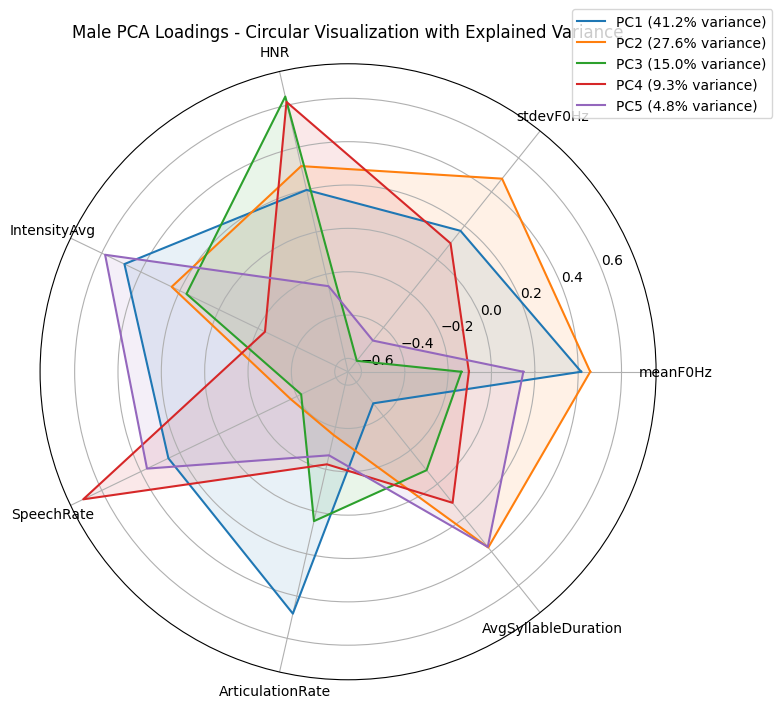


Male PCA Feature Importance and Ranking:
   PCA Component  Explained Variance  Feature Ranking
0              1            0.411518                1
1              2            0.276350                1
2              3            0.149743                1
3              4            0.092520                1
4              5            0.047869                1

Female Data - Original number of features: 7
Female Data - Reduced number of features after PCA: 5

Female PCA Loadings:
                          PC1       PC2       PC3       PC4       PC5
meanF0Hz             0.361138  0.431430  0.372861  0.090944  0.284281
stdevF0Hz            0.347198 -0.096875  0.666269 -0.206305  0.246067
HNR                  0.010290  0.665574 -0.425987 -0.034215  0.470227
IntensityAvg         0.442578  0.244787 -0.017275  0.623497 -0.519118
SpeechRate           0.289369 -0.534048 -0.263666  0.488781  0.566042
ArticulationRate     0.496134 -0.058696 -0.266712 -0.314028 -0.213699
AvgSyllableDuration -0

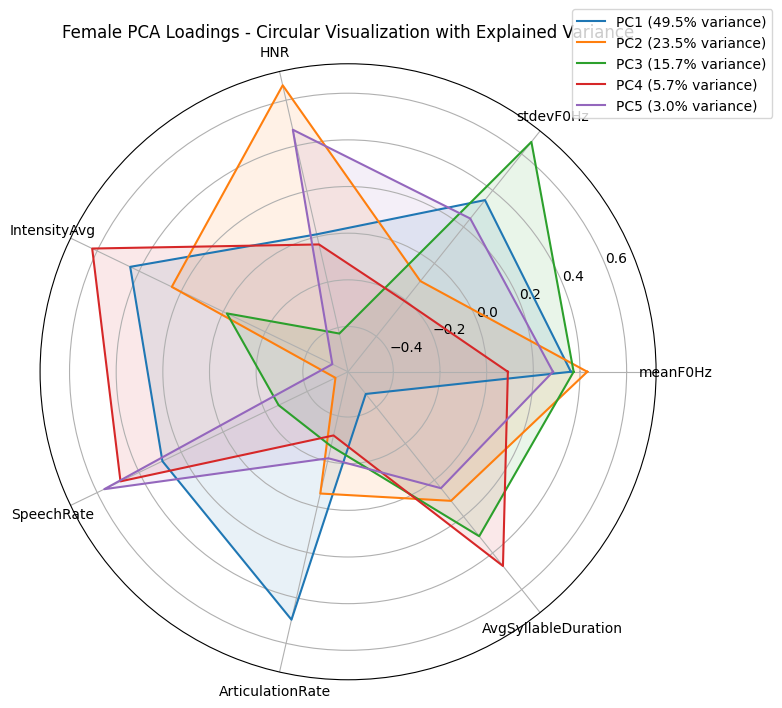


Female PCA Feature Importance and Ranking:
   PCA Component  Explained Variance  Feature Ranking
0              1            0.494657                1
1              2            0.235405                1
2              3            0.157363                1
3              4            0.057314                1
4              5            0.030098                1


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

# Function to process entries, apply PCA, plot loadings, and perform RFE
def process_entries(entries, gender_label):
    # Preparing the data
    X = entries.drop(['voiceID', 'Semantic_Analysis', 'Acoustic_Annotation', 'Tag'], axis=1)
    y = entries['Tag']

    # Splitting the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Step 1: Standardize the Data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Step 2: Apply PCA
    pca = PCA(n_components=0.95)  # Retain 95% of variance
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    print(f"\n{gender_label} Data - Original number of features: {X.shape[1]}")
    print(f"{gender_label} Data - Reduced number of features after PCA: {X_train_pca.shape[1]}")

    # Get PCA loadings
    loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(X_train_pca.shape[1])], index=X.columns)

    # Display loadings for inspection
    print(f"\n{gender_label} PCA Loadings:")
    print(loadings)

    # Plot circular visualization of PCA loadings with explained variance
    explained_variance = pca.explained_variance_ratio_
    explained_variance_percentage = [f"PC{i+1} ({var:.1%} variance)" for i, var in enumerate(explained_variance)]

    # Setup for polar plot
    num_features = len(X.columns)
    angles = np.linspace(0, 2 * np.pi, num_features, endpoint=False).tolist()
    angles += angles[:1]  # Complete the circle

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    # Plot each component's loadings
    for i, component_label in enumerate(explained_variance_percentage):
        values = loadings.iloc[:, i].tolist()
        values += values[:1]  # Loop back to the starting point
        ax.plot(angles, values, label=component_label)
        ax.fill(angles, values, alpha=0.1)

    # Add feature labels to the plot
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(X.columns)

    # Add legend with variance explanation
    plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))

    # Display the plot
    plt.title(f"{gender_label} PCA Loadings - Circular Visualization with Explained Variance")
    plt.show()

    # Step 3: Use RFE with Random Forest Classifier
    rf = RandomForestClassifier(random_state=42)
    rfe = RFE(estimator=rf, n_features_to_select=5)  # Select the top 5 features
    rfe.fit(X_train_pca, y_train)

    # Get the selected features
    selected_features = rfe.support_
    feature_ranking = rfe.ranking_

    # Summary of PCA components, variance explained, and feature rankings
    pca_feature_importance = pd.DataFrame({
        'PCA Component': np.arange(1, pca.n_components_ + 1),
        'Explained Variance': pca.explained_variance_ratio_,
        'Feature Ranking': feature_ranking
    })

    print(f"\n{gender_label} PCA Feature Importance and Ranking:")
    print(pca_feature_importance)

# Assuming `df_balanced` contains your dataset
# Filter for female and male entries
female_entries = df_balanced[df_balanced['voiceID'].str.contains(r'F\d{3}')]
male_entries = df_balanced[df_balanced['voiceID'].str.contains(r'M\d{3}')]

# Process both male and female entries
process_entries(male_entries, "Male")
process_entries(female_entries, "Female")
